# Delhivery Case Study

## Problem Statement:

Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
the commerce operating system. They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities. The case study has following objectives:

To ensure data integrity and quality by addressing missing values
and structuring the dataset appropriately.

To enable the extraction of valuable features from raw data, which can be
utilized for building accurate forecasting models.

To facilitate the identification of patterns, insights, and actionable
recommendations crucial for optimizing their logistics operations.

To conduct hypothesis testing and outlier detection in order that Delhivery can refine their processes and further enhance the quality of service they provide.

## Basic Overview of Dataset

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
# read the csv file 
df = pd.read_csv('delhivery_data.csv')

In [5]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
# shape of data shows the rows and columns of the dataset

df.shape

(144867, 24)

In [7]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [8]:
# Datatype of all columns is as follows:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [9]:
# check for null values 

df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

source_name and destination_name have a few null values which are very less as compared to the total datapoints. Hence we can afford deleting the nulls in this case for simplicity

In [10]:
#  Removing null values

df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [11]:
# Checking for duplicate rows -

duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape[0])

0


No duplicate rows are found

In [12]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
std,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


In [13]:
# Converting time columns into pandas datatime

df['od_start_time'] =  pd.to_datetime(df['od_start_time'])
df['od_end_time']  =  pd.to_datetime(df['od_end_time'])
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [15]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## Merging the rows

### Grouping by Segments

In [16]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()


df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144311,92.0,65.3487,94.0
144312,118.0,82.7212,115.0
144313,138.0,103.4265,149.0
144314,155.0,122.3150,176.0


### Aggregating at segment level

In [17]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

    }

In [18]:
# Groupby mini-trips, sorting by time

segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

In [19]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [20]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  object        
 3   trip_creation_time              26222 non-null  datetime64[ns]
 4   route_schedule_uuid             26222 non-null  object        
 5   route_type                      26222 non-null  object        
 6   trip_uuid                       26222 non-null  object        
 7   source_center                   26222 non-null  object        
 8   source_name                     26222 non-null  object        
 9   destination_center              26222 non-null  object        
 10  destination_name                26222 non-null  object        
 11  od

In [21]:
#  Calculate time taken between od_start_time and od_end_time

segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / (60)
segment['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26217      62.115193
26218      91.087797
26219      44.174403
26220     287.474007
26221      66.933565
Name: od_time_diff_hour, Length: 26222, dtype: float64

In [22]:
segment.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929


It turns out that values of od_time_diff_hour and start_scan_to_end_scan are almost the same. Let's drop start_scan_to_end_scan column to avoid duplication

In [23]:
segment = segment.drop('start_scan_to_end_scan', axis = 1)
segment = segment.drop('index', axis = 1)

#### Aggregating at Trip Level

In [24]:
df['trip_uuid'].nunique()

14787

There are 14,787 unique trips in the data. We will aggreagte the distances and durations for this part

In [25]:
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    }

In [26]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)

In [27]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [28]:
trip[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14782,83.0,82.0
14783,21.0,21.0
14784,282.0,281.0
14785,264.0,258.0


In [29]:
trip[trip['trip_uuid'] == 'trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
5917,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),195.386819,82.981842,170.0,89.0,107.4515,167.0,102.7106,88.0


In [30]:
trip[['actual_distance_to_destination','osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
...,...,...
14782,57.762332,73.4630
14783,15.513784,16.0882
14784,38.684839,58.9037
14785,134.723836,171.1103


The 'osrm_distance' i.e. the predicted distance by some model is higher as compared to the actual distance of the destination, which clearly shows the errors in prediction

## Feature Engineering

### Analyze the components of source and destination

In [31]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_time_diff_hour               14787 non-null  float64       
 10  actual_distance_to_destination  14787 non-null  float64       
 11  ac

In [32]:
trip_copy = trip

In [33]:
trip_copy['destination_name'] = trip_copy['destination_name'].str.lower() #lowering all columns
trip_copy['source_name'] = trip_copy['source_name'].str.lower()

In [34]:
# Extract state 
def place2state(x):
    # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
    state = x.split('(')[1]

    return state[:-1] #removing ')' from ending


In [35]:
# Extract city

def place2city(x):
    # We will remove state
    city = x.split(' (')[0]

    city = city.split('_')[0]

    #Now dealing with edge cases

    if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'


    return city

In [36]:
# extract place 
def place2city_place(x):

    # We will remove state
    x = x.split(' (')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]


    # Now we need to deal with edge cases or imporper name convention

    #if len(x.split(' ')) == 2:
    #

    return x.split(' ')[0]

In [37]:
# Extract code

def place2code(x):
    # We will remove state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'


In [38]:
trip_copy['destination_state'] = trip_copy['destination_name'].apply(lambda x: place2state(x))
trip_copy['destination_city']  = trip_copy['destination_name'].apply(lambda x: place2city(x))
trip_copy['destination_place'] = trip_copy['destination_name'].apply(lambda x: place2city_place(x))
trip_copy['destination_code']  = trip_copy['destination_name'].apply(lambda x: place2code(x))

In [39]:
destination_details = trip_copy[['destination_state', 'destination_city', 'destination_place', 'destination_code']]

In [40]:
destination_details['destination_state'].nunique()

31

31 destination states

In [41]:
destination_details['destination_city'].nunique()

839

839 destination cities

In [42]:
destination_details['destination_state'].value_counts(normalize = True)*100

maharashtra               17.319267
karnataka                 15.513627
haryana                   11.090823
tamil nadu                 7.330764
uttar pradesh              5.443971
telangana                  5.301954
gujarat                    4.963820
west bengal                4.713600
delhi                      4.443092
punjab                     4.172584
rajasthan                  3.719483
andhra pradesh             2.989112
bihar                      2.481910
madhya pradesh             2.366944
kerala                     1.825928
assam                      1.568946
jharkhand                  1.224048
uttarakhand                0.825049
orissa                     0.804761
chandigarh                 0.439575
goa                        0.351660
chhattisgarh               0.290796
himachal pradesh           0.284033
arunachal pradesh          0.169067
jammu & kashmir            0.135254
dadra and nagar haveli     0.114966
meghalaya                  0.054102
mizoram                    0

Top 3 destination states are:
    Maharashtra,
    Karnataka,
    Haryana

In [43]:
destination_details['destination_city'].value_counts(normalize = True)*100

bengaluru     8.257253
mumbai        6.546291
gurgaon       5.930885
delhi         3.746534
bangalore     3.726246
                ...   
mokokchung    0.006763
digboi        0.006763
shirur        0.006763
sitamau       0.006763
lunawada      0.006763
Name: destination_city, Length: 839, dtype: float64

Top 3 destination cities are:
    Bengaluru, 
    Mumbai,
    Gurgaon

In [44]:
(destination_details['destination_place']== 'north').sum()

50

In [45]:
(destination_details['destination_place']== 'south').sum()

8

In [46]:
(destination_details['destination_place']== 'east').sum()

196

In [47]:
(destination_details['destination_place']== 'west').sum()

1

In [48]:
(destination_details['destination_place']== 'central').sum()

846

Highest traffic is observed in central zone followed by east and north

In [49]:
trip_copy['source_state'] = trip_copy['source_name'].apply(lambda x: place2state(x))
trip_copy['source_city']  = trip_copy['source_name'].apply(lambda x: place2city(x))
trip_copy['source_place'] = trip_copy['source_name'].apply(lambda x: place2city_place(x))
trip_copy['source_code']  = trip_copy['source_name'].apply(lambda x: place2code(x))

In [50]:
source_details = trip_copy[['source_state', 'source_city', 'source_place', 'source_code']]

In [51]:
source_details['source_state'].nunique()

29

29 source states

In [52]:
source_details['source_city'].nunique()

713

713 source cities

In [53]:
source_details['source_state'].value_counts(normalize = True)*100

maharashtra               18.353960
karnataka                 14.492460
haryana                   12.328397
tamil nadu                 7.026442
telangana                  5.301954
uttar pradesh              5.139650
gujarat                    5.072023
delhi                      4.902955
west bengal                4.497193
punjab                     3.624806
rajasthan                  3.476026
andhra pradesh             2.941773
bihar                      2.373707
madhya pradesh             2.150538
kerala                     1.954419
assam                      1.812403
jharkhand                  1.082032
uttarakhand                0.770947
orissa                     0.723609
chandigarh                 0.628931
goa                        0.439575
chhattisgarh               0.290796
himachal pradesh           0.229932
jammu & kashmir            0.114966
dadra and nagar haveli     0.101440
pondicherry                0.081152
nagaland                   0.033813
arunachal pradesh          0

Top 3 source states are: Maharashta, Karnataka, Haryana

Benguluru and Bangalore are same let's replace this records

In [54]:
source_details['source_city'] = source_details['source_city'].replace('bangalore', 'bengaluru')

C:\Users\Nisha Pandit\AppData\Local\Temp\ipykernel_5280\220024645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_details['source_city'] = source_details['source_city'].replace('bangalore', 'bengaluru')


In [55]:
source_details['source_city'].value_counts(normalize = True)*100

bengaluru        12.030838
gurgaon           7.628322
bhiwandi          4.713600
mumbai            4.510719
delhi             3.705958
                   ...    
rupnarayanpur     0.006763
plassey           0.006763
mylduthuri        0.006763
modinagar         0.006763
sandur            0.006763
Name: source_city, Length: 712, dtype: float64

Top 3 source cities are: Bengaluru, Gurgaon, Bhiwandi

In [56]:
(source_details['source_place']== 'west').sum()

7

In [57]:
(source_details['source_place']== 'east').sum()

240

In [58]:
(source_details['source_place']== 'north').sum()

56

In [59]:
(source_details['source_place']== 'south').sum()

31

In [60]:
(source_details['source_place']== 'central').sum()

886

Highest traffic is observed in central zone followed by east and north

### Analyze the Time component

In [61]:
trip_copy['trip_year'] = trip_copy['trip_creation_time'].dt.year
trip_copy['trip_month'] = trip_copy['trip_creation_time'].dt.month
trip_copy['trip_hour'] = trip_copy['trip_creation_time'].dt.hour
trip_copy['trip_day'] = trip_copy['trip_creation_time'].dt.day
trip_copy['trip_week'] = trip_copy['trip_creation_time'].dt.isocalendar().week
trip_copy['trip_dayofweek'] = trip_copy['trip_creation_time'].dt.dayofweek

In [62]:
trip_duration_details = trip_copy[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

In [63]:
trip_duration_details['trip_year'].value_counts()

2018    14787
Name: trip_year, dtype: int64

In [64]:
trip_duration_details['trip_month'].value_counts(normalize= True)*100

9     87.98945
10    12.01055
Name: trip_month, dtype: float64

87% of the records are of september 2018 and 12% are of october, 2018

In [65]:
trip_duration_details['trip_week'].value_counts(normalize= True)*100

38    33.820248
39    29.769392
37    24.399811
40     12.01055
Name: trip_week, dtype: Float64

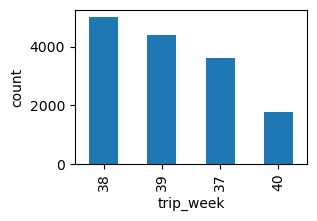

In [66]:
plt.figure(figsize = (3,2))
trip_duration_details['trip_week'].value_counts().plot(kind = 'bar')
plt.xlabel('trip_week')
plt.ylabel('count')
plt.show()

33% of the record is of 38th week of the year. Data shows that the most trips were created on the 37th to 39th week of the year

## In-depth Analysis

### Outlier Detection and Treatment

In [67]:
num_cols = ['actual_distance_to_destination', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

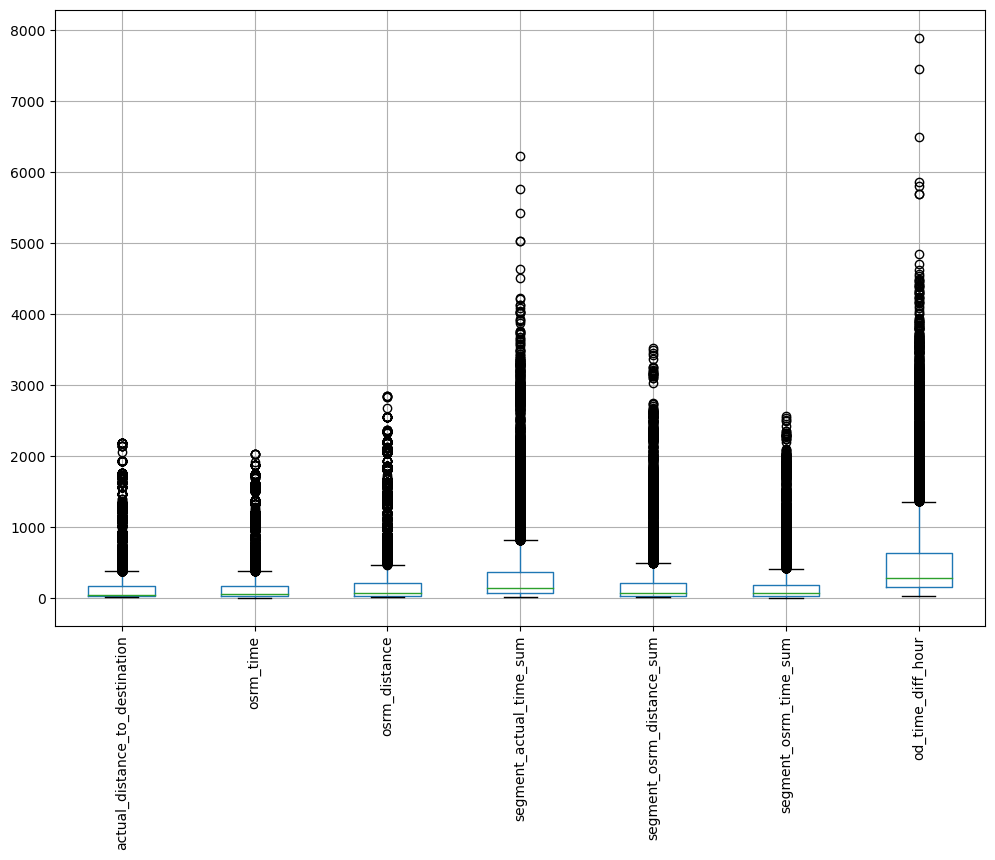

In [68]:
trip[num_cols].boxplot(rot=90, figsize=(12,8))
plt.show()

In [69]:
for i in num_cols:    
    q1 = trip[i].quantile(0.25)
    q3 = trip[i].quantile(0.75)
    print('\n', 'q1:', q1, '\n' 'q3:',q3)
    IQR=q3-q1
    outliers = trip[((trip[i]<(q1-1.5*IQR)) | (trip[i]>(q3+1.5*IQR)))]
    print("num of outliers : ",len(outliers))
    print("percent outliers : ",np.round(len(outliers) * 100/len(df),2))


 q1: 22.777098943155323 
q3: 163.5912581579725
num of outliers :  1452
percent outliers :  1.01

 q1: 29.0 
q3: 168.0
num of outliers :  1506
percent outliers :  1.04

 q1: 30.7569 
q3: 206.6442
num of outliers :  1522
percent outliers :  1.05

 q1: 66.0 
q3: 364.0
num of outliers :  1644
percent outliers :  1.14

 q1: 32.57885 
q3: 216.5606
num of outliers :  1550
percent outliers :  1.07

 q1: 30.0 
q3: 184.0
num of outliers :  1485
percent outliers :  1.03

 q1: 149.69849585833333 
q3: 633.5376970833333
num of outliers :  1275
percent outliers :  0.88


In [71]:
trip = trip[~((trip[num_cols] < (q1 - 1.5 * IQR)) | (trip[num_cols] > (q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

In [72]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,karnataka,doddablpur,chikadpp,d,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,maharashtra,mumbai,mirard,ip,maharashtra,mumbai hub,mumbai,none,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,karnataka,sandur,wrdn1dpp,d,karnataka,bellary,bellary,none,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),190.487849,24.597048,61.0,23.0,28.0647,60.0,28.0647,23.0,tamil nadu,chennai,chennai,none,tamil nadu,chennai,chennai,none,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.005634,9.100510,24.0,13.0,12.0184,24.0,12.0184,13.0,tamil nadu,chennai,vandalur,dc,tamil nadu,chennai,chrompet,dpc,2018,9,0,12,37,2


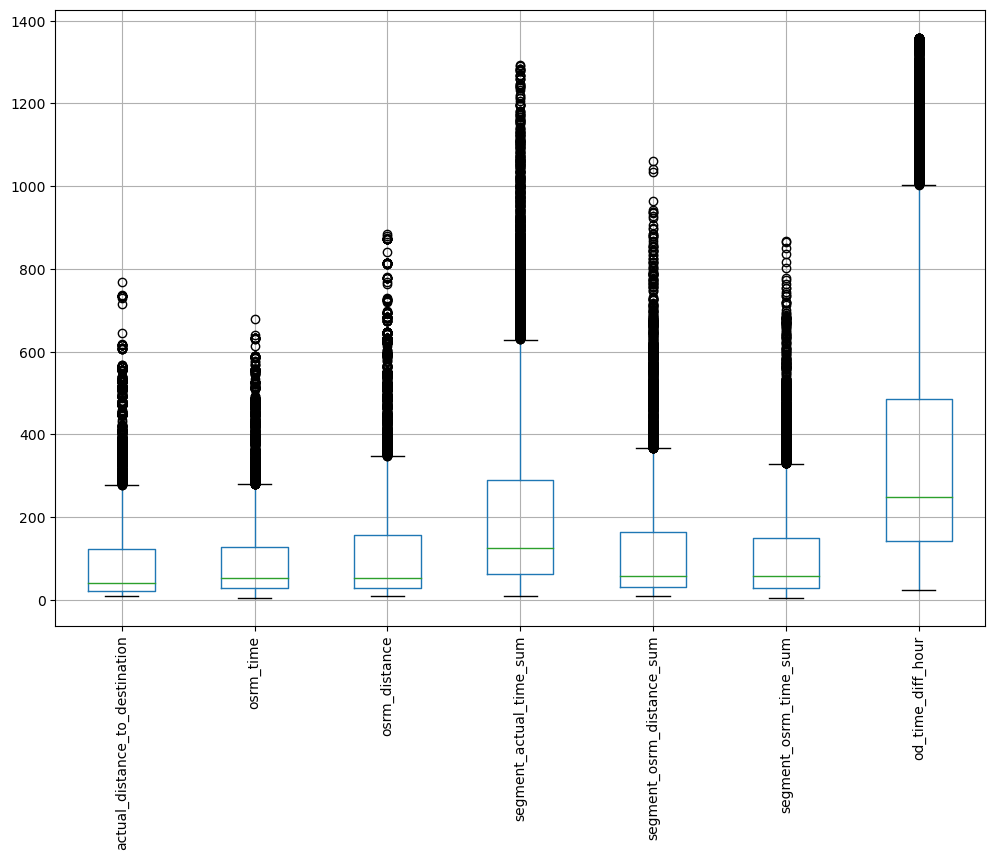

In [73]:
trip[num_cols].boxplot(rot=90, figsize=(12,8))
plt.show()

### Encoding Categorical Features

In [74]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            13512 non-null  object        
 1   trip_creation_time              13512 non-null  datetime64[ns]
 2   route_schedule_uuid             13512 non-null  object        
 3   route_type                      13512 non-null  object        
 4   trip_uuid                       13512 non-null  object        
 5   source_center                   13512 non-null  object        
 6   source_name                     13512 non-null  object        
 7   destination_center              13512 non-null  object        
 8   destination_name                13512 non-null  object        
 9   od_time_diff_hour               13512 non-null  float64       
 10  actual_distance_to_destination  13512 non-null  float64       
 11  ac

In [75]:
trip.describe(include = object)

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code
count,13512,13512,13512,13512,13512,13512,13512,13512,13512,13512,13512,13512,13512,13512,13512,13512
unique,2,1426,2,13512,925,925,1026,1026,31,832,857,31,29,710,766,31
top,training,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,trip-153671042288605164,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),maharashtra,bengaluru,central,d,maharashtra,bengaluru,central,hb
freq,9722,53,8848,1,713,713,581,581,2416,1221,731,2725,2483,1130,787,2671


In [76]:
# Target Variable is assumed to be od_time_diff_hour for the present study
y = 'od_time_diff_hour'

In [77]:
# Separate categorical and numerical columns
categorical_cols = trip.select_dtypes(include=['object']).columns.tolist()
numerical_cols = trip.select_dtypes(include=['float64', 'int64']).columns.tolist()
datetime_cols = trip.select_dtypes(include = ['datetime64']).columns.tolist()
numerical_cols.remove('od_time_diff_hour')  # Remove target variable from numerical columns
categorical_cols

['data',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'destination_state',
 'destination_city',
 'destination_place',
 'destination_code',
 'source_state',
 'source_city',
 'source_place',
 'source_code']

In [78]:
# One-Hot Encoding for low cardinality categorical features
ohe_cols = ['destination_state', 'source_state', 'data', 'route_type'] 
ohe = OneHotEncoder(sparse=False, drop='first')
encoded_ohe = ohe.fit_transform(trip[ohe_cols])
encoded_ohe_df = pd.DataFrame(encoded_ohe, columns=ohe.get_feature_names_out(ohe_cols))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [79]:
# Target Encoding for high cardinality categorical features
target_cols = list(set(categorical_cols) - set(ohe_cols))
target_encoder = TargetEncoder()
encoded_target = target_encoder.fit_transform(trip[target_cols], trip[y])

In [80]:
# Combine Encoded Features with Numerical Features
encoded_features = pd.concat([encoded_ohe_df, encoded_target], axis=1)
numerical_features = trip[numerical_cols]
datetime_features = trip[datetime_cols]
features = pd.concat([encoded_features, numerical_features, datetime_features], axis=1)

### Normalize/ Standardize the numerical features

In [81]:
numerical_features.columns

Index(['actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum', 'trip_year', 'trip_month', 'trip_hour',
       'trip_day', 'trip_dayofweek'],
      dtype='object')

In [82]:
scaler = StandardScaler()

In [83]:
scaled_numerical_features = scaler.fit_transform(numerical_features)

In [84]:
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

In [85]:
features = pd.concat([encoded_features, scaled_numerical_df, datetime_features], axis=1)

In [86]:
features.shape

(13512, 85)

The features dataframe can be further used for building a Machine Learning model and to predict the duration to reach the destination from source

## Hypothesis Testing

#### 1. actual_time aggregated value and OSRM time aggregated value.

Null Hypothesis (H0): There is no significant difference between actual_time and osrm_time.

Alternative Hypothesis (Ha): There is a significant difference between actual_time and osrm_time.

Statistical Test: Since we are comparing means of two numeric variables (actual_time and osrm_time), a two-sample t-test is appropriate assuming the data is normally distributed and the variances are equal.

Let's verify the assumptions for T-Test

In [87]:
actual_time_agg = trip['actual_time']
osrm_time_agg = trip['osrm_time']

In [88]:
# Check assumptions - Normality and Equal Variance (for t-test)
normality_check_1 = st.shapiro(actual_time_agg)
normality_check_2 = st.shapiro(osrm_time_agg)
equal_variance_check_1 = st.levene(actual_time_agg, osrm_time_agg)


print("Normality Check (Actual Time):", normality_check_1)
print("Normality Check (OSRM Time):", normality_check_2)
print("Equal Variance Check:", equal_variance_check_1)


Normality Check (Actual Time): ShapiroResult(statistic=0.7709275484085083, pvalue=0.0)
Normality Check (OSRM Time): ShapiroResult(statistic=0.7547405958175659, pvalue=0.0)
Equal Variance Check: LeveneResult(statistic=2174.165112613395, pvalue=0.0)


C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [89]:
# Perform t-test if assumptions are met

if normality_check_1.pvalue > 0.05 and normality_check_2.pvalue > 0.05 and equal_variance_check_1.pvalue > 0.05:
    t_statistic, p_value = st.ttest_ind(actual_time_agg, osrm_time_agg)
   
    # Set significance level (alpha)
    alpha = 0.05
    
    print("Two-sample t-test results:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    
    # Interpret the p-value
    if p_value < alpha:
        print(f"Reject the null hypothesis (H0). There is a significant difference between actual_time and osrm_time.")
    else:
        print("Fail to reject the null hypothesis (H0). There is no significant difference between actual_time and osrm_time.")

else:
    
    # Perform Mann-Whitney U test if assumptions are violated
    u_statistic, p_value = st.mannwhitneyu(actual_time_agg, osrm_time_agg)

    # Set significance level (alpha)
    alpha = 0.05

    # Print test results
    print("Mann-Whitney U test results:")
    print("U-statistic:", u_statistic)
    print("p-value:", p_value)

    # Interpret the p-value
    if p_value < alpha:
        print(f"Reject the null hypothesis (H0). There is a significant difference between actual_time and osrm_time.")
    else:
        print("Fail to reject the null hypothesis (H0). There is no significant difference between actual_time and osrm_time.")


Mann-Whitney U test results:
U-statistic: 131986162.5
p-value: 0.0
Reject the null hypothesis (H0). There is a significant difference between actual_time and osrm_time.


#### 2. actual_time aggregated value and segment actual time aggregated value.

In [90]:
actual_time_agg
segment_actual_time_agg = trip['segment_actual_time_sum']

In [91]:
# Check assumptions - Normality and Equal Variance (for t-test)
normality_check_3 = st.shapiro(actual_time_agg)
normality_check_4 = st.shapiro(segment_actual_time_agg)
equal_variance_check_2 = st.levene(actual_time_agg, segment_actual_time_agg)


print("Normality Check (Actual Time):", normality_check_3)
print("Normality Check (Segment Actual Time):", normality_check_4)
print("Equal Variance Check:", equal_variance_check_2)


Normality Check (Actual Time): ShapiroResult(statistic=0.7709275484085083, pvalue=0.0)
Normality Check (Segment Actual Time): ShapiroResult(statistic=0.7700742483139038, pvalue=0.0)
Equal Variance Check: LeveneResult(statistic=0.22721053888740045, pvalue=0.6336037845633051)


In [92]:
# Perform t-test if assumptions are met

if normality_check_3.pvalue > 0.05 and normality_check_4.pvalue > 0.05 and equal_variance_check_2.pvalue > 0.05:
    t_statistic, p_value = st.ttest_ind(actual_time_agg, segment_actual_time_agg)
   
    # Set significance level (alpha)
    alpha = 0.05
    
    print("Two-sample t-test results:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    
    # Interpret the p-value
    if p_value < alpha:
        print(f"Reject the null hypothesis (H0). There is a significant difference between actual_time and segment_actual_time.")
    else:
        print("Fail to reject the null hypothesis (H0). There is no significant difference between actual_time and segment_actual_time.")

else:
    
    # Perform Mann-Whitney U test if assumptions are violated
    u_statistic, p_value = st.mannwhitneyu(actual_time_agg, segment_actual_time_agg)

    # Set significance level (alpha)
    alpha = 0.05

    # Print test results
    print("Mann-Whitney U test results:")
    print("U-statistic:", u_statistic)
    print("p-value:", p_value)

    # Interpret the p-value
    if p_value < alpha:
        print(f"Reject the null hypothesis (H0). There is a significant difference between actual_time and segment_actual_time")
    else:
        print("Fail to reject the null hypothesis (H0). There is no significant difference between actual_time and segment_actual_time.")


Mann-Whitney U test results:
U-statistic: 91864978.5
p-value: 0.36745170232172164
Fail to reject the null hypothesis (H0). There is no significant difference between actual_time and segment_actual_time.


#### 3. OSRM distance aggregated value and segment OSRM distance aggregated value.

In [93]:
osrm_dist_agg = trip['osrm_distance']
segment_osrm_dist_agg = trip['segment_osrm_distance_sum']

In [94]:
# Check assumptions - Normality and Equal Variance (for t-test)
normality_check_5 = st.shapiro(osrm_dist_agg)
normality_check_6 = st.shapiro(segment_osrm_dist_agg)
equal_variance_check_3 = st.levene(osrm_dist_agg, segment_osrm_dist_agg)


print("Normality Check (OSRM Distance):", normality_check_5)
print("Normality Check (Segment OSRM Distance ):", normality_check_6)
print("Equal Variance Check:", equal_variance_check_3)


Normality Check (OSRM Distance): ShapiroResult(statistic=0.733802080154419, pvalue=0.0)
Normality Check (Segment OSRM Distance ): ShapiroResult(statistic=0.732792854309082, pvalue=0.0)
Equal Variance Check: LeveneResult(statistic=16.043858579929985, pvalue=6.205759069304129e-05)


In [95]:
# Perform t-test if assumptions are met

if normality_check_5.pvalue > 0.05 and normality_check_6.pvalue > 0.05 and equal_variance_check_3.pvalue > 0.05:
    t_statistic, p_value = st.ttest_ind(osrm_dist_agg, segment_osrm_dist_agg)
   
    # Set significance level (alpha)
    alpha = 0.05
    
    print("Two-sample t-test results:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    
    # Interpret the p-value
    if p_value < alpha:
        print(f"Reject the null hypothesis (H0). There is a significant difference between OSRM_distance and segment_OSRM_distance.")
    else:
        print("Fail to reject the null hypothesis (H0). There is no significant difference between OSRM_distance and segment_OSRM_distance.")

else:
    
    # Perform Mann-Whitney U test if assumptions are violated
    u_statistic, p_value = st.mannwhitneyu(osrm_dist_agg, segment_osrm_dist_agg)

    # Set significance level (alpha)
    alpha = 0.05

    # Print test results
    print("Mann-Whitney U test results:")
    print("U-statistic:", u_statistic)
    print("p-value:", p_value)

    # Interpret the p-value
    if p_value < alpha:
        print(f"Reject the null hypothesis (H0). There is a significant difference between OSRM_distance and segment_OSRM_distance.")
    else:
        print("Fail to reject the null hypothesis (H0). There is no significant difference between OSRM_distance and segment_OSRM_distance.")


Mann-Whitney U test results:
U-statistic: 87863493.5
p-value: 9.340716949557706e-08
Reject the null hypothesis (H0). There is a significant difference between OSRM_distance and segment_OSRM_distance.


#### 4. OSRM time aggregated value and segment OSRM time aggregated value.

In [96]:
osrm_time_agg = trip['osrm_time']
segment_osrm_time_agg = trip['segment_osrm_time_sum']

In [97]:
# Check assumptions - Normality and Equal Variance (for t-test)
normality_check_7 = st.shapiro(osrm_time_agg)
normality_check_8 = st.shapiro(segment_osrm_time_agg)
equal_variance_check_4 = st.levene(osrm_time_agg, segment_osrm_time_agg)


print("Normality Check (OSRM time):", normality_check_7)
print("Normality Check (Segment OSRM time ):", normality_check_8)
print("Equal Variance Check:", equal_variance_check_4)


Normality Check (OSRM time): ShapiroResult(statistic=0.7547405958175659, pvalue=0.0)
Normality Check (Segment OSRM time ): ShapiroResult(statistic=0.7504358291625977, pvalue=0.0)
Equal Variance Check: LeveneResult(statistic=45.90781371789009, pvalue=1.2649464663669453e-11)


In [98]:
# Perform t-test if assumptions are met

if normality_check_7.pvalue > 0.05 and normality_check_8.pvalue > 0.05 and equal_variance_check_4.pvalue > 0.05:
    t_statistic, p_value = st.ttest_ind(osrm_time_agg, segment_osrm_time_agg)
   
    # Set significance level (alpha)
    alpha = 0.05
    
    print("Two-sample t-test results:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    
    # Interpret the p-value
    if p_value < alpha:
        print(f"Reject the null hypothesis (H0). There is a significant difference between OSRM_time and segment_OSRM_time.")
    else:
        print("Fail to reject the null hypothesis (H0). There is no significant difference between OSRM_time and segment_OSRM_time.")

else:
    
    # Perform Mann-Whitney U test if assumptions are violated
    u_statistic, p_value = st.mannwhitneyu(osrm_time_agg, segment_osrm_time_agg)

    # Set significance level (alpha)
    alpha = 0.05

    # Print test results
    print("Mann-Whitney U test results:")
    print("U-statistic:", u_statistic)
    print("p-value:", p_value)

    # Interpret the p-value
    if p_value < alpha:
        print(f"Reject the null hypothesis (H0). There is a significant difference between OSRM_time and segment_OSRM_time.")
    else:
        print("Fail to reject the null hypothesis (H0). There is no significant difference between OSRM_time and segment_OSRM_time.")


Mann-Whitney U test results:
U-statistic: 87424255.5
p-value: 1.6978667079071283e-09
Reject the null hypothesis (H0). There is a significant difference between OSRM_time and segment_OSRM_time.


## Business Insights

1. **Predicted vs. Actual Distance Discrepancy**:
   - The predicted distance (`osrm_distance`) by the model is higher compared to the actual distance to the destination, indicating inaccuracies in the prediction model.
   
2. **Top Destination States and Cities**:
   - The top three destination states are Maharashtra, Karnataka, and Haryana.
   - The top three destination cities are Bengaluru, Mumbai, and Gurgaon.
   
3. **Traffic Distribution**:
   - The highest traffic is observed in the central zone, followed by the east and north zones.
   
4. **Top Source Cities**:
   - The top three source cities are Bengaluru, Gurgaon, and Bhiwandi.
   
5. **Temporal Distribution of Data**:
   - 87% of the records are from September 2018, and 12% are from October 2018.
   - 33% of the records are from the 38th week of the year, with most trips created between the 37th and 39th weeks.
   
6. **Hypothesis Testing Results**:
   - There is a significant difference between `actual_time` and `osrm_time`, indicating that the predicted times are not aligning well with the actual times.
   - There is no significant difference between `actual_time` and `segment_actual_time`, suggesting that segment actual times are consistent with the overall actual time.
   - There is a significant difference between `OSRM_distance` and `segment_OSRM_distance`, as well as between `OSRM_time` and `segment_OSRM_time`, highlighting discrepancies in segment-level predictions.


## Recommendations



1. **Improve Prediction Models**:
   - **Distance Predictions**: Refine the model used for predicting distances (`osrm_distance`) to reduce discrepancies. Consider incorporating additional variables or using more advanced modeling techniques (e.g., machine learning models) to improve accuracy.
   - **Time Predictions**: Similarly, enhance the prediction model for `osrm_time` to better align with actual delivery times. This can help in improving delivery scheduling and customer satisfaction.

2. **Optimize Logistics Operations**:
   - **High Traffic Zones**: Focus on optimizing operations in high-traffic zones, particularly in the central zone, which sees the highest traffic. This could involve adjusting staffing, optimizing routing, or increasing resources in these areas.
   - **Peak Times**: Given the high concentration of trips in the 37th to 39th weeks, consider implementing strategies to handle peak periods more efficiently, such as temporary increases in capacity or improved scheduling.

3. **Targeted Improvements in Key Areas**:
   - **Top Source and Destination Cities**: Pay special attention to operations in Bengaluru, Gurgaon, Bhiwandi (top source cities), and Mumbai, Gurgaon, Bengaluru (top destination cities). Streamline processes and address any bottlenecks specific to these locations.
   - **State-Level Strategies**: Implement state-specific strategies for Maharashtra, Karnataka, and Haryana, considering their high volume of deliveries. Tailored logistics plans can help in improving efficiency and customer service in these key states.

4. **Data Quality and Integrity**:
   - **Data Cleaning**: Continue efforts to ensure data quality by addressing any remaining missing values and ensuring the dataset is structured appropriately.
   - **Feature Extraction**: Extract valuable features from raw data to build more accurate forecasting models. This can involve advanced feature engineering techniques to derive meaningful insights from the data.

5. **Outlier Detection and Process Refinement**:
   - **Outlier Treatment**: Implement robust outlier detection and treatment methods to refine processes. This will help in maintaining data integrity and improving the quality of service.
   - **Continuous Monitoring**: Establish a system for continuous monitoring and analysis of key metrics to identify and address potential issues proactively.

6. **Actionable Insights**:
   - Use the insights gained from hypothesis testing and data analysis to make informed decisions and actionable recommendations for optimizing logistics operations.
   - Regularly review and update models and strategies based on new data and changing business requirements to ensure continuous improvement.

By implementing these recommendations, Delhivery can enhance its logistics operations, improve prediction accuracy, and ultimately provide better service to its customers.